<a href="https://colab.research.google.com/github/yashlab/GreatLearning/blob/master/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore

In [0]:
wine_data = pd.read_csv('winequality-red.csv')

In [4]:
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


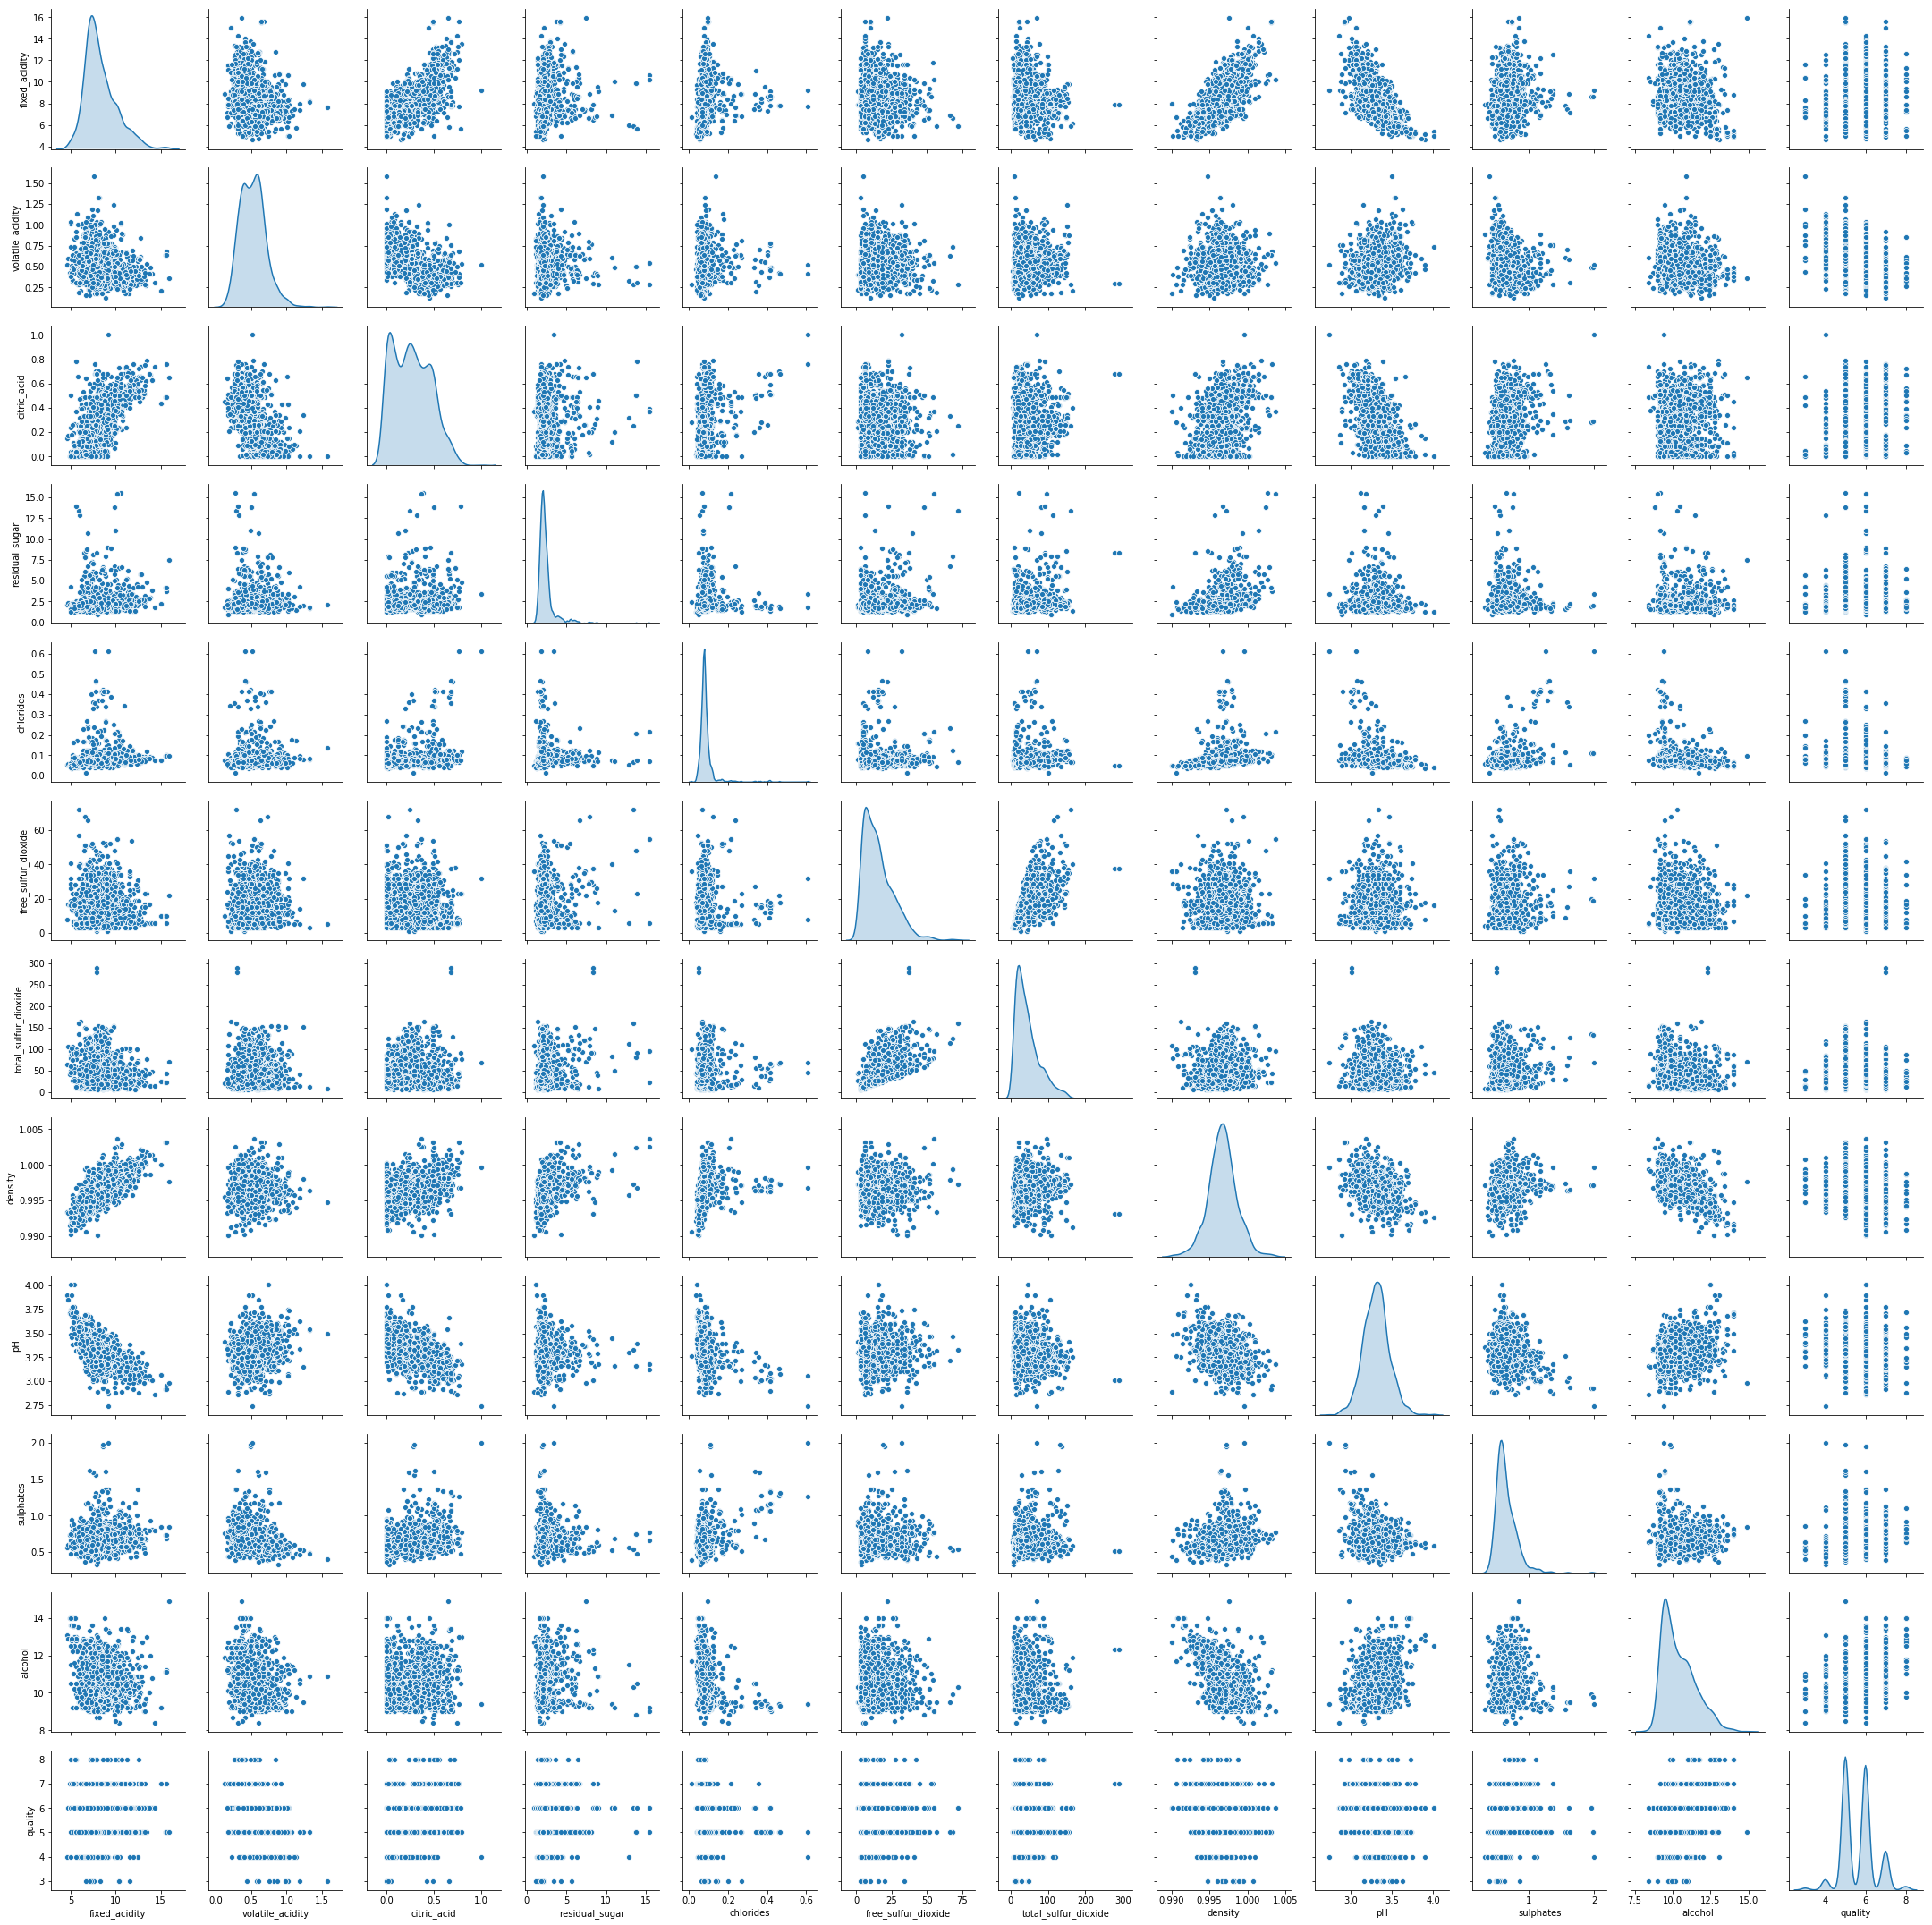

In [9]:
sns.pairplot(wine_data,diag_kind="kde")

In [10]:
wine_data.shape

(1599, 12)

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=6,linkage="average")

In [13]:
model.fit(wine_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [14]:
model.labels_

array([5, 2, 2, ..., 2, 2, 2])

In [15]:
wine_data['label']= model.labels_

wine_data.groupby(['label']).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
label,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,65,65
1,2,2,2,2,2,2,2,2,2,2,2,2
2,589,589,589,589,589,589,589,589,589,589,589,589
3,2,2,2,2,2,2,2,2,2,2,2,2
4,185,185,185,185,185,185,185,185,185,185,185,185
5,756,756,756,756,756,756,756,756,756,756,756,756


In [0]:
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage

In [0]:
from scipy.spatial.distance import pdist

In [0]:
z= linkage(wine_data,'average')

In [0]:
c,cop_dist = cophenet(z,pdist(wine_data))

In [21]:
c

0.8333815767944763

In [22]:
cop_dist

array([35.07093532, 35.07093532, 35.07093532, ..., 10.48315196,
       10.89591089, 10.89591089])

In [0]:
import matplotlib.pyplot as plt

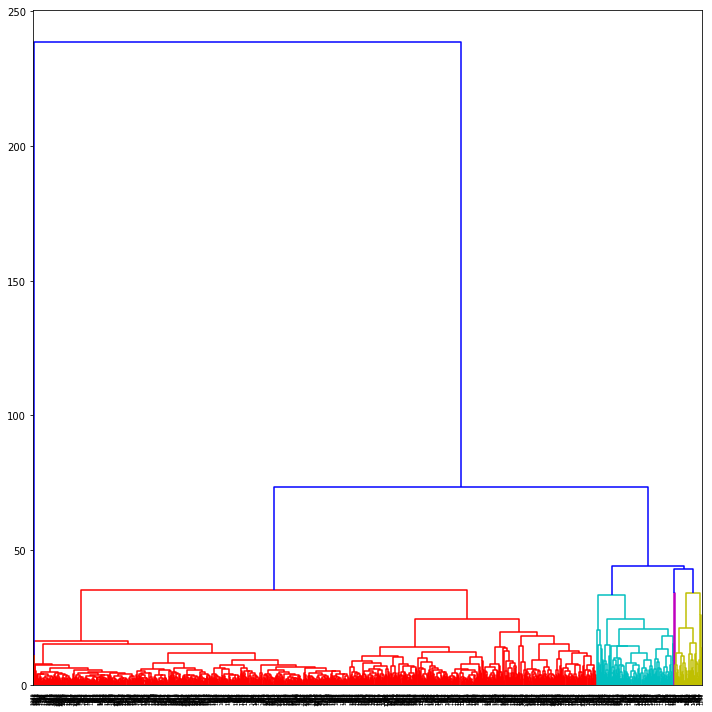

In [26]:
plt.figure(figsize=(10,10))
dendrogram(z,leaf_rotation=90.,color_threshold=40)
plt.tight_layout()